INFO: Query finished. [astroquery.utils.tap.core]
nan
nan


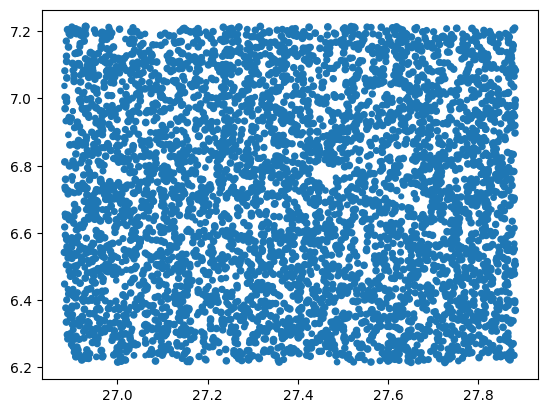

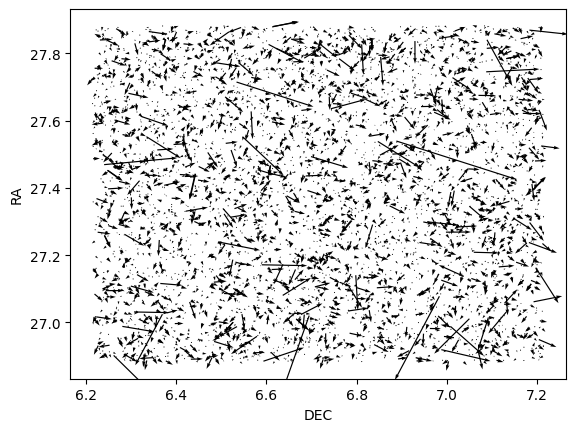

In [11]:

import os
import numpy as np
from matplotlib import pyplot as plt
from astropy import units as u
from astropy.io import ascii
from astropy.table import unique
from astropy.table import Table
import numpy as np
from astropy.io import ascii
from astropy import units as u
from astropy.table import Column
from astroquery.vizier import Vizier

from astropy.coordinates import SkyCoord, Distance
from astropy.io import fits
from astropy.table import QTable

from astropy.utils.data import download_file
from astroquery.gaia import Gaia

Gaia.MAIN_GAIA_TABLE = "gaiadr3.gaia_source"

import astropy.units as u

from astropy.coordinates import SkyCoord

from astroquery.gaia import Gaia
#NGC2266
cra=6+42/60+52.0/3600
cdec=27+22/60+56/3600
coord = SkyCoord(ra=cra,dec=cdec, unit=(u.degree, u.degree), frame='icrs')
width = u.Quantity(1, u.deg)

height = u.Quantity(1, u.deg)
r = Gaia.query_object_async(coordinate=coord, width=width, height=height)

Gaia.ROW_LIMIT=-1
Empty=np.asarray(r['ra'])
Empty=np.stack((Empty, np.asarray(r['dec'])), axis=1)
Empty=np.column_stack([Empty, np.asarray(r['phot_g_mean_mag'])])

MEAN=np.mean(Empty[:,2])
MAX=np.max(Empty[:,2])
MIN=np.argmin(Empty[:,2])
STD=np.sqrt(np.sum((Empty[:,2]-MEAN)**2)/len(Empty[:,2]))
print(STD)
print(MEAN)

np.savetxt("Data.txt",Empty)
#x=r['ra']=00+47/60+ 11.5/3600
#y=r['dec']=+85+14/60+ 38/3600
#plt.scatter(y,x)

plt.scatter(r['dec'],r['ra'],s=r['phot_g_mean_mag'])
plt.show()
fig, ax = plt.subplots()

ax.quiver(r['ra'].filled(0),r['dec'].filled(0),r['pmra'].filled(0),r['pmdec'].filled(0))
plt.xlabel('DEC')
plt.ylabel('RA')
plt.show()


In [17]:
rra=cra
ddec=cdec
ngc_center_3d = SkyCoord(rra*u.deg,ddec*u.deg)#,distance=1.96*u.kpc,pm_ra_cosdec=-2.3087*u.mas/u.yr,pm_dec=-0.9565*u.mas/u.yr)
v = Vizier(catalog="2MASS", columns=['*', 'Date'])  
v.ROW_LIMIT = -1
result = v.query_region(ngc_center_3d, radius=0.5*u.deg)
tmass_table = result[0]
print(tmass_table)



 RAJ2000    DEJ2000        _2MASS       Jmag  ... Cflg Xflg Aflg    Date   
   deg        deg                       mag   ...                          
---------- ---------- ---------------- ------ ... ---- ---- ---- ----------
  6.497296  26.927691 00255935+2655396 13.809 ...  000    0    0 1997-10-23
  6.518910  26.933485 00260453+2656005 13.051 ...  000    0    0 1997-10-23
  6.547340  26.914736 00261136+2654530 14.683 ...  000    0    0 1997-10-23
  6.550775  26.917833 00261218+2655041 13.532 ...  000    0    0 1997-10-23
  6.508806  26.936913 00260211+2656128 13.647 ...  000    0    0 1997-10-23
  6.523246  26.921387 00260557+2655169 16.181 ...  000    0    0 1997-10-23
       ...        ...              ...    ... ...  ...  ...  ...        ...
  6.903547  27.834455 00273685+2750040 14.395 ...  000    0    0 1997-10-23
  6.992730  27.817093 00275825+2749015 15.781 ...  000    0    0 1997-10-23
  6.971948  27.820539 00275326+2749139 15.470 ...  cc0    0    0 1997-10-23
  6.972111  

In [18]:
m = Vizier(catalog='WISE',columns=['*'])
m.ROW_LIMIT = -1
result_w = m.query_region(ngc_center_3d, radius=0.5*u.deg)
wise_table = result_w[0]
print(wise_table)



        WISE         RAJ2000    DEJ2000   eeMaj  eeMin  ...  ex var   d2M   _2M
                       deg        deg     arcsec arcsec ...          arcsec    
------------------- ---------- ---------- ------ ------ ... --- ---- ------ ---
J002653.63+265336.3   6.723494  26.893438  0.084  0.077 ...   0 00nn  0.260  2M
J002654.46+265320.4   6.726933  26.889022  0.397  0.357 ...   0 1nnn     --  2M
J002654.79+265311.9   6.728317  26.886657  0.435  0.402 ...   0 0nnn     --  2M
J002651.79+265326.4   6.715819  26.890670  0.235  0.221 ...   0 11nn  0.265  2M
J002655.14+265303.7   6.729752  26.884375  0.234  0.218 ...   0 1nnn  0.232  2M
J002653.21+265356.0   6.721715  26.898917  0.089  0.083 ...   0 01nn  0.265  2M
                ...        ...        ...    ...    ... ... ...  ...    ... ...
J002608.33+275105.5   6.534725  27.851549  0.859  0.786 ...   0 nnnn     --  2M
J002612.37+275107.4   6.551552  27.852071  1.239  1.139 ...   0 nnnn     --  2M
J002614.07+275028.6   6.558655  27.84129

In [16]:
s = Vizier(catalog='PanStarrs',columns=['*'])
s.ROW_LIMIT = -1
result_s = s.query_region(ngc_center_3d, radius=0.5*u.deg)
panstar_table = result_s[0]
print(panstar_table)

   RAJ2000       DEJ2000          objID        ...  yKmag  e_yKmag  yFlags 
     deg           deg                         ...   mag     mag           
------------- ------------- ------------------ ... ------- ------- --------
  6.717990480  26.885829030 140260067179583488 ... 19.0393  0.0005     4120
  6.737433990  26.882873310 140250067374999917 ...      --      --   114720
  6.724401910  26.892807440 140270067243562081 ... 17.6434  0.0486 16777496
  6.723535420  26.893412970 140270067235062680 ... 12.5084  0.0057   115000
  6.729753100  26.884333840 140260067297521793 ... 16.5150  0.0093   115000
  6.721703160  26.898868100 140270067217219234 ... 13.8493  0.0011   115000
          ...           ...                ... ...     ...     ...      ...
  6.565224660  27.856216740 141420065652368014 ... 19.7551  0.0887   115000
  6.560287520  27.859799710 141430065602992349 ... 15.0106  0.0058   115000
  6.574914510  27.866151490 141430065748999946 ... 19.9841  0.1854   115000
  6.56631445

In [15]:
l = Vizier(catalog='MSX',columns=['*'])
l.ROW_LIMIT = -1
result_l = l.query_region(ngc_center_3d, radius=50*u.deg)
msx_table = result_l[0]
print(msx_table)

      MSX6C       RAJ2000  DEJ2000   ePos  ...     D      q_D     E      q_E
                    deg      deg    arcsec ...     Jy             Jy        
----------------- -------- -------- ------ ... ---------- --- ---------- ---
G079.2269-02.2151 310.6444  38.7022    0.3 ...       7.24   4       4.06   3
G080.6650-02.1460 311.7270  39.8718    0.3 ...       6.84   4       4.97   4
G089.0339-02.2668 319.4274  46.0631    0.2 ...       6.38   4       3.14   2
G077.5055-02.2107 309.3090  37.3413    0.3 ...       5.81   4       5.35   4
G078.1374-02.1351 309.7155  37.8896    0.3 ...       4.93   4       1.41   1
G089.1303-02.0062 319.2550  46.3140    0.2 ...       3.63   4       3.33   3
              ...      ...      ...    ... ...        ... ...        ... ...
G133.3714+02.7097  36.8940  63.6157    1.1 ...     -0.551   0       5.01   1
G133.3794+02.6220  36.8396  63.5311    1.4 ...     -0.604   0      -2.03   0
G133.3621+02.2376  36.4954  63.1787    1.2 ...     -0.477   0      -1.48   0

In [27]:
#from astroquery.ipac.irsa import Irsa
#from astropy import coordinates
#table = Irsa.query_region("m31", catalog="MSX Catalog 6", spatial="Polygon",
#polygon=[coordinates.SkyCoord(ra=10.1, dec=10.1, unit=(u.deg, u.deg), frame='icrs'),coordinates.SkyCoord(ra=10.0, dec=10.1, unit=(u.deg, u.deg), frame='icrs'),
#coordinates.SkyCoord(ra=10.0, dec=10.0, unit=(u.deg, u.deg), frame='icrs')
   #     ])
#print(table)
coords=SkyCoord(r['ra'],r['dec'])
tmass_coords = SkyCoord(tmass_table['RAJ2000'],tmass_table['DEJ2000'])
wise_coords=SkyCoord(wise_table['RAJ2000'],wise_table['DEJ2000'])
panstar_coords=SkyCoord(panstar_table['RAJ2000'],panstar_table['DEJ2000'])
msx_coords=SkyCoord(msx_table['RAJ2000'],msx_table['DEJ2000'])
idx_gaia,sep2d_gaia, _ = coords.match_to_catalog_sky(tmass_coords)
idx_gaia1,sep2d_gaia1, _1 = coords.match_to_catalog_sky(wise_coords)
idx_gaia2,sep2d_gaia2, _2 = coords.match_to_catalog_sky(panstar_coords)
idx_gaia3,sep2d_gaia3, _3 = coords.match_to_catalog_sky(msx_coords)
#добавить это все в таблицу

In [48]:
Jmag=tmass_table['Jmag'][idx_gaia]
Hmag=tmass_table['Hmag'][idx_gaia]
Kmag=tmass_table['Kmag'][idx_gaia]
print(Jmag)
Gmag=r['phot_g_mean_mag'][idx_gaia]
print(Gmag)
W1mag=wise_table['W1mag']
W2mag=wise_table['W2mag']
W3mag=wise_table['W3mag']
W4mag=wise_table['W4mag']

 Jmag 
 mag  
------
15.504
15.504
16.219
16.078
15.535
14.376
   ...
12.666
16.337
16.337
12.666
12.666
16.152
16.273
Length = 4964 rows
phot_g_mean_mag
      mag      
---------------
      20.549162
      20.549162
      17.986528
      20.567236
       18.88241
      18.335278
            ...
      15.110878
      21.099575
      21.099575
      15.110878
      15.110878
       21.90759
      18.534052
Length = 4964 rows


In [46]:
Flux_gaia=10**((Gmag-25.6884)/-2.5)#convert dc.zah.uni-heidelberg.de/tableinfo/gaia.dr2
print(Flux)

[  113.68294   113.68294  1204.3391  ... 17021.938      32.53297
   727.3432 ]


In [47]:
Flux_2massJ=1594*10**(-0.4*Jmag)
Flux_2massH=1024*10**(-0.4*Hmag)
Flux_2massK=666.7*10**(-0.4*Kmag)



In [43]:
print(Flux_2massJ)

[0.00100205 0.00100205 0.00051867 ... 0.01368007 0.00055168 0.0004935 ]
